In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
config = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv.dnn_DetectionModel(frozen_model, config)

In [5]:
classNames = []
file = 'coco.txt'

with open(file, 'rt') as fpt:
    classNames = fpt.read().rstrip('\n').split('\n')

print(classNames)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000019E1618F9D0>

## Object Detection in Image

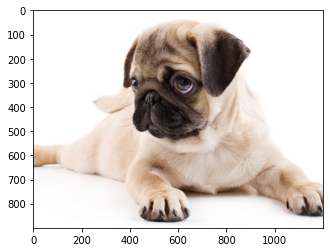

In [7]:
img = cv.imread('dog.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [8]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [9]:
print(ClassIndex)

[[18]]


In [10]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv.rectangle(img, boxes, (255, 0, 0), 2)
    cv.putText(img, classNames[ClassInd-2], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness = 3)

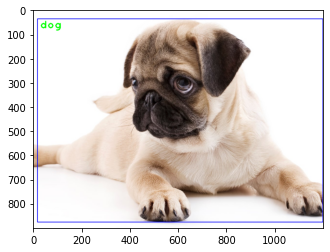

In [11]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Object Detection in Video

In [34]:
cap = cv.VideoCapture("road.mp4")

if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise I0Error("cannot open video")

In [35]:
font_scale = 3
font = cv.FONT_HERSHEY_PLAIN

In [36]:
while True :
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv.rectangle(frame, boxes, (255, 0, 0), 2 )
                cv.putText(frame, classNames[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0))
    cv.imshow('Object Detection tutorial', frame)
    
    if (cv.waitKey(2) & 0xFF == ord('q')):
        break
        
cap.release()
cv.destroyAllWindows()

[[3]
 [8]]
[[3]
 [8]]
[[3]]
[[3]
 [8]]
()
()
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [8]]
()
()
[[3]]
[[3]
 [8]]
[[5]
 [3]]
[[8]]
()
[[3]
 [5]]
[[3]]
()
[[8]]
()
()
[[3]
 [8]
 [5]]
[[3]
 [8]]
[[3]]
[[3]]
[[3]]
()
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]]
[[3]]
[[3]]
[[3]]
()
[[3]
 [8]]
()
()
[[3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]]
()
[[3]]
[[3]]
[[3]]
[[3]]
()
[[3]]
()
()
()
()
()
()
()
[[3]]
[[8]]
()
()
()
()
()
[[3]]
()
()
()
()
()
()
()
()
()
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]]
[[3]]
[[8]
 [3]]
()
[[3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]]
()
()
()
[[3]]
()
()
()
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
()
[[3]
 [3]]
[[3]
 [3]]
()
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]
[[3]]


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-1i5nllza\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
